In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread("../1.png", cv2.IMREAD_GRAYSCALE)

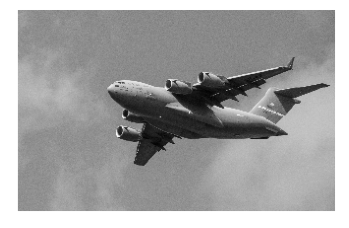

In [5]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
type(image)

numpy.ndarray

In [7]:
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [8]:
image.shape

(218, 341)

In [9]:
image[0,0]

255

In [10]:
image_bgr = cv2.imread("../1.png", cv2.IMREAD_COLOR)

image_bgr[0,0]

array([255, 255, 255], dtype=uint8)

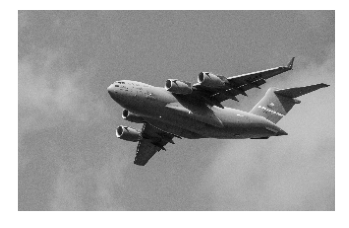

In [11]:
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()


In [12]:
image = cv2.imread("../1.png", cv2.IMREAD_GRAYSCALE)
# Save image
cv2.imwrite("../plane_new.jpg", image)

True

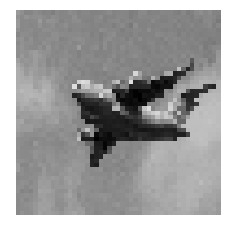

In [13]:
# Load image as grayscale
image = cv2.imread("../1.png",cv2.IMREAD_GRAYSCALE)
# Resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image, (50, 50))
# View image
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()


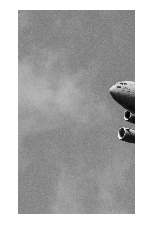

In [14]:
# Load image in grayscale
image = cv2.imread("../1.png",cv2.IMREAD_GRAYSCALE)
# Select first half of the columns and all rows
image_cropped = image[:,:128]
# Show image
plt.imshow(image_cropped, cmap="gray"), plt.axis("off")
plt.show()


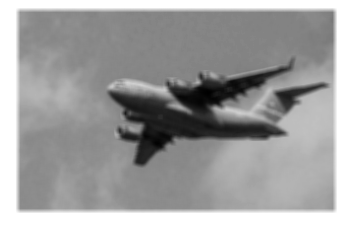

In [15]:
image = cv2.imread("../1.png",cv2.IMREAD_GRAYSCALE)
# Blur image
image_blurry = cv2.blur(image, (5,5))
# Show image
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()


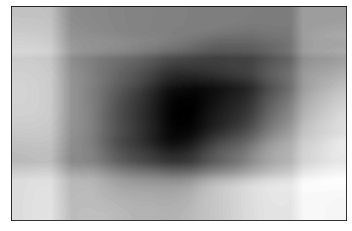

In [16]:
# Blur image
image_very_blurry = cv2.blur(image, (100,100))
# Show image
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]),
plt.yticks([])
plt.show()

In [18]:
# Create kernel
kernel = np.ones((5,5)) / 25.0
# Show kernel
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

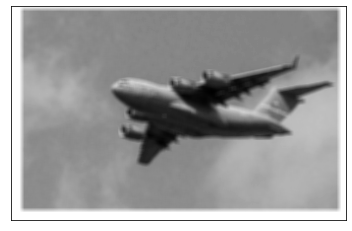

In [19]:
# Apply kernel
image_kernel = cv2.filter2D(image, -1, kernel)
# Show image
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]),
plt.yticks([])
plt.show()

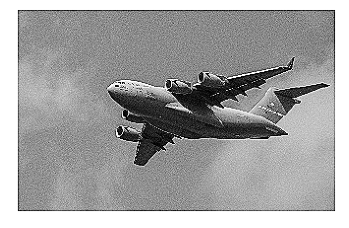

In [20]:
image = cv2.imread("../1.png",cv2.IMREAD_GRAYSCALE)
# Create kernel
kernel = np.array([[0, -1, 0],
[-1, 5,-1],
[0, -1, 0]])
# Sharpen image
image_sharp = cv2.filter2D(image, -1, kernel)
# Show image
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

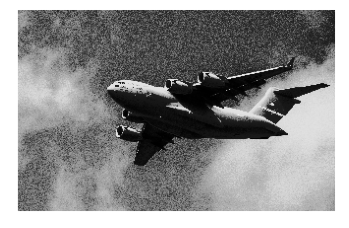

In [21]:
# Enhance image
image_enhanced = cv2.equalizeHist(image)
# Show image
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

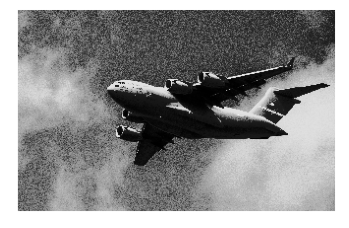

In [24]:
image_bgr = cv2.imread("../1.png")

image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
# Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
# Convert to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

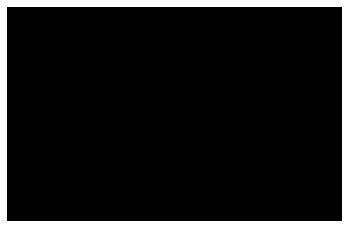

In [33]:
image_bgr = cv2.imread("../1.png")
# Convert BGR to HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
# Define range of blue values in HSV
lower_blue = np.array([5,10,50])
upper_blue = np.array([50,205,5])
# Create mask
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)
# Mask image
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr,mask=mask)
# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr_masked,
cv2.COLOR_BGR2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()


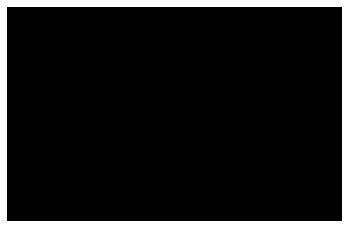

In [34]:
# Show image
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

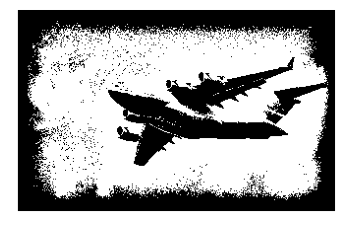

In [35]:
# Load image as grayscale
image_grey = cv2.imread("../1.png",cv2.IMREAD_GRAYSCALE)

# Apply adaptive thresholding
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
max_output_value,
cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY,
neighborhood_size,
subtract_from_mean)
# Show image
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()


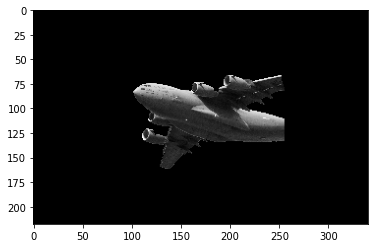

(0.0, 1.0, 0.0, 1.0)

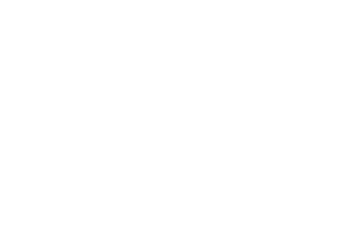

In [36]:
image_bgr = cv2.imread('../1.png')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Rectangle values: start x, start y, width, height
rectangle = (0, 56, 256, 150)
# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)
# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
# Run grabCut
cv2.grabCut(image_rgb, # Our image
mask, # The Mask
rectangle, # Our rectangle
bgdModel, # Temporary array for background
fgdModel, # Temporary array for background
5, # Number of iterations
cv2.GC_INIT_WITH_RECT) # Initiative using our
rectangle
# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0,
1).astype('uint8')
# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
# Show image
plt.imshow(image_rgb_nobg),plt.show()
plt.axis("off")

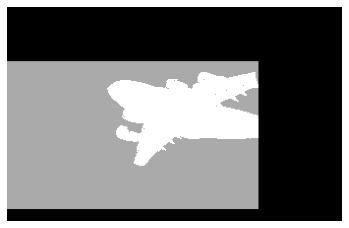

In [37]:
# Show mask
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

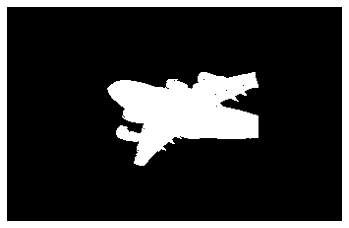

In [38]:
plt.imshow(mask_2, cmap='gray'), plt.axis("off")
plt.show()

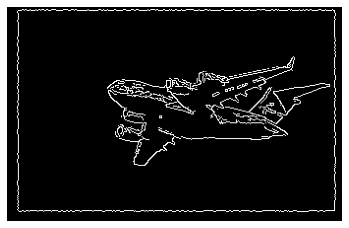

In [39]:
# Load image as grayscale
image_gray = cv2.imread("../1.png",cv2.IMREAD_GRAYSCALE)
# Calculate median intensity
median_intensity = np.median(image_gray)
# Set thresholds to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1.0 - 0.33) *
median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) *
median_intensity))
# Apply canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold,
upper_threshold)
# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

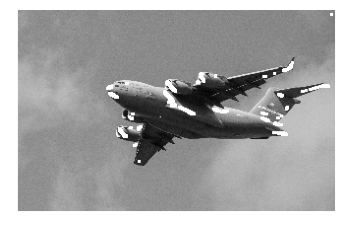

In [41]:
# Load image as grayscale
image_bgr = cv2.imread("../1.png")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)
# Set corner detector parameters
block_size = 2
aperture = 29
free_parameter = 0.04
# Detect corners
detector_responses = cv2.cornerHarris(image_gray,
block_size,
aperture,
free_parameter)
# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)
# Only keep detector responses greater than threshold, mark as white
threshold = 0.02
image_bgr[detector_responses >
threshold *
detector_responses.max()] = [255,255,255]
# Convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
# Show image
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()


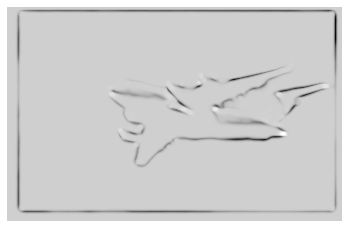

In [42]:
# Show potential corners
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()

In [46]:
image = cv2.imread("../1.png",
cv2.IMREAD_GRAYSCALE)
# Resize image to 10 pixels by 10 pixels
image_10x10 = cv2.resize(image, (10, 10))
# Convert image data to one-dimensional vector
image_10x10.flatten()


array([150, 147, 139, 138, 134, 138, 138, 138, 131, 139, 148, 143, 135,
       144, 143, 133, 138, 138, 139, 132, 162, 151, 147, 143, 138, 137,
       140, 133,  97, 137, 176, 168, 148, 222, 131, 131, 115,  32, 168,
       174, 170, 170, 157,  35,  61,  22, 138, 205,  52, 188, 165, 156,
       151, 140,  36,  37,  54,  65, 192, 190, 148, 147, 141, 146,  16,
       139, 164, 179, 184, 177, 158, 143, 150, 154, 135, 139, 178, 178,
       180, 178, 147, 167, 148, 152, 140, 144, 174, 170, 183, 168, 142,
       167, 151, 162, 148, 149, 164, 170, 170, 162], dtype=uint8)

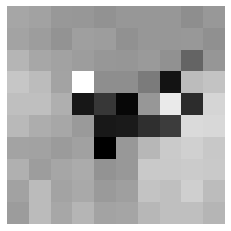

In [47]:
plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()

In [48]:
image_10x10.shape,image_10x10.flatten().shape

((10, 10), (100,))

In [49]:
# Load image
image_bgr = cv2.imread("../1.png",cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Create a list for feature values
features = []
# Calculate the histogram for each color channel
colors = ("r","g","b")
# For each channel: calculate histogram and add to feature value list
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # Image
                        [i], # Index of channel
                        None, # No mask
                        [256], # Histogram size
                        [0,256]) # Range
    features.extend(histogram)
# Create a vector for an observation's feature values
observation = np.array(features).flatten()
# Show the observation's value for the first five features
observation[0:5]


array([0., 0., 1., 0., 5.], dtype=float32)

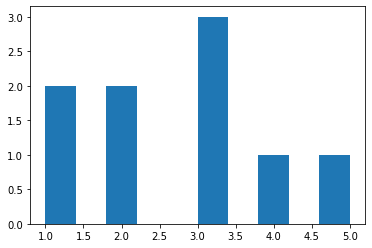

In [50]:
import pandas as pd
# Create some data
data = pd.Series([1, 1, 2, 2, 3, 3, 3, 4, 5])
# Show the histogram
data.hist(grid=False)
plt.show()

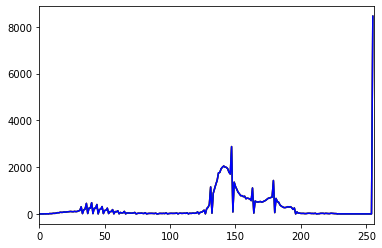

In [52]:
# Calculate the histogram for each color channel
colors = ("r","g","b")
# For each channel: calculate histogram, make plot
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # Image
                            [i], # Index of channel
                            None, # No mask
                            [256], # Histogram size
                            [0,256]) # Range
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])
    
# Show plot
plt.show()
